In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

In [154]:
##import and concatenate datasets
##Mac:
# path = r'/Users/asariversjulien/Documents/Data/CSV files/Sapelo/Yearly data'
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)

# df = pd.concat(li, axis=0, ignore_index=True)

##PC:
path = r'C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Yearly data' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  ## more options can be specified also
#     print(df)

# df = df[df['Species_Code'] == 'A1'] ##eventually, you will want to do this

df

,B1,B2,B3,B4,B5,B6,B7,system:index,Site,Species_Code,...,Quadrat_Area,Zone,Plot,Latitude,Plant_Biomass,Sample_Size,Longitude,Date,B10,B11
0,0.0271,0.0301,0.0309,0.0551,0.0357,0.2911,0.0289,0,1,A1,...,0.25,1,1,31.538627,516.324,23,-81.422539,10/11/2000,NaN,NaN
1,0.0339,0.0488,0.0459,0.0952,0.0691,0.2915,0.0376,1,2,A1,...,0.25,1,1,31.536199,1152.400,21,-81.296118,10/11/2000,NaN,NaN
2,0.0358,0.0578,0.0494,0.1039,0.0690,0.2920,0.0332,2,3,A1,...,0.25,1,1,31.518920,710.396,20,-81.228956,10/18/2000,NaN,NaN
3,0.0315,0.0393,0.0421,0.0773,0.0630,0.2920,0.0332,3,4,A1,...,0.25,1,1,31.451676,1534.304,25,-81.365498,10/10/2000,NaN,NaN
4,0.0314,0.0533,0.0495,0.1394,0.1024,0.2911,0.0549,4,5,A1,...,0.25,1,1,31.436090,2022.264,25,-81.339919,10/10/2000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,0.0193,0.0247,0.0397,0.0358,0.0885,0.0635,0.0347,172,4,A1,...,0.25,1,56,31.451282,820.556,12,-81.366151,10/4/2019,0.2977,0.2949
3212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173,2,A1,...,0.25,1,58,31.535648,210.604,15,-81.295100,10/11/2019,NaN,NaN
3213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174,2,A1,...,0.25,1,62,31.536196,424.300,15,-81.295883,10/11/2019,NaN,NaN
3214,0.0297,0.0381,0.0532,0.0484,0.0789,0.0530,0.0265,175,6,A1,...,0.25,1,64,31.388000,295.636,8,-81.279858,10/9/2019,0.2980,0.2949


In [155]:
##Bands and indices

df['Sensor'] = np.where(df['Year']<2013, 'Landsat 5', 'Landsat 8') ##make sure no other sensors are being used

df['ndvi'] = np.where(df['Sensor'] == 'Landsat 5', (df['B4']-df['B3'])/(df['B4']+df['B3']), \
                      (df['B5']-df['B4'])/(df['B5']+df['B4'])) ##ndvi conditional based on whether sensor is Landsat-5 or 8

df['Blue_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B1'], df['B2'])
df['Green_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B2'], df['B3'])
df['Red_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B3'], df['B4'])
df['NIR_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B4'], df['B5'])
df['SWIR1_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B5'], df['B6'])
df['SWIR2_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B7'], df['B7'])

##IMPORTANT: again, these bands between landsat 5 and 8 may not be able to be compared directly

##Variables from Byrd et al. 2018:
df['savi'] = ((df['NIR_band']-df['Red_band'])*1.5)/(df['NIR_band']+df['Red_band']+0.5)
df['wdrvi5'] = (0.5*df['NIR_band']-df['Red_band'])/(0.5*df['NIR_band']+df['Red_band'])
df['nd_r_g'] = (df['Red_band']-df['Green_band'])/(df['Red_band']+df['Green_band'])
df['nd_g_b'] = (df['Green_band']-df['Blue_band'])/(df['Green_band']+df['Blue_band'])
df['nd_swir2_nir'] = (df['SWIR2_band']-df['NIR_band'])/(df['SWIR2_band']+df['NIR_band'])
df['nd_swir2_r'] = (df['SWIR2_band']-df['Red_band'])/(df['SWIR2_band']+df['Red_band'])

df

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(df)

,B1,B2,B3,B4,B5,B6,B7,system:index,Site,Species_Code,...,Red_band,NIR_band,SWIR1_band,SWIR2_band,savi,wdrvi5,nd_r_g,nd_g_b,nd_swir2_nir,nd_swir2_r
0,0.0271,0.0301,0.0309,0.0551,0.0357,0.2911,0.0289,0,1,A1,...,0.0309,0.0551,0.0357,0.0289,0.061945,-0.057314,0.013115,0.052448,-0.311905,-0.033445
1,0.0339,0.0488,0.0459,0.0952,0.0691,0.2915,0.0376,1,2,A1,...,0.0459,0.0952,0.0691,0.0376,0.115349,0.018182,-0.030623,0.180169,-0.433735,-0.099401
2,0.0358,0.0578,0.0494,0.1039,0.0690,0.2920,0.0332,2,3,A1,...,0.0494,0.1039,0.0690,0.0332,0.125134,0.025160,-0.078358,0.235043,-0.515682,-0.196126
3,0.0315,0.0393,0.0421,0.0773,0.0630,0.2920,0.0332,3,4,A1,...,0.0421,0.0773,0.0630,0.0332,0.085244,-0.042724,0.034398,0.110169,-0.399095,-0.118194
4,0.0314,0.0533,0.0495,0.1394,0.1024,0.2911,0.0549,4,5,A1,...,0.0495,0.1394,0.1024,0.0549,0.195747,0.169463,-0.036965,0.258560,-0.434894,0.051724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,0.0193,0.0247,0.0397,0.0358,0.0885,0.0635,0.0347,172,4,A1,...,0.0358,0.0885,0.0635,0.0347,0.126622,0.105559,-0.051656,0.232919,-0.436688,-0.015603
3212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173,2,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174,2,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3214,0.0297,0.0381,0.0532,0.0484,0.0789,0.0530,0.0265,175,6,A1,...,0.0484,0.0789,0.0530,0.0265,0.072932,-0.101878,-0.047244,0.165389,-0.497154,-0.292390


B1
B2
B3
B4
B5
B6
B7
system:index
Site
Species_Code
Year
Quadrat_Area
Zone
Plot
Latitude
Plant_Biomass
Sample_Size
Longitude
Date
B10
B11
Sensor
ndvi
Blue_band
Green_band
Red_band
NIR_band
SWIR1_band
SWIR2_band
savi
wdrvi5
nd_r_g
nd_g_b
nd_swir2_nir
nd_swir2_r


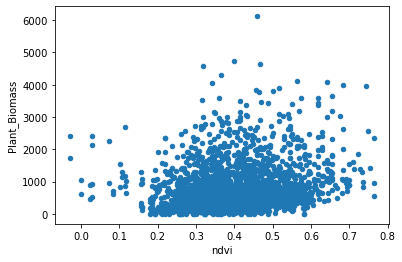

In [156]:
g = df.plot(kind = 'scatter', x = 'ndvi', y = 'Plant_Biomass')

g
for col in df.columns:
    print(col)

In [157]:
##Merging elevation point data with band dataset prior to model development

elev_10m = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Point_elevation/DEM_vals_10m.csv')

elev_10m.rename(columns={'first':'Elevation'}, inplace=True)

elev_10m = elev_10m.drop_duplicates(subset=['Latitude'])

print(len(df['Latitude'].unique()))
print(len(df['Longitude'].unique()))
print(len(elev_10m['Latitude'].unique()))
print(len(elev_10m['Longitude'].unique()))

print(elev_10m)

df = pd.merge(df, elev_10m, on = 'Latitude') ##there are a few things that do not add up in this dataframe

out_dir = os.path.expanduser('~/Downloads')
out_csv = os.path.join(out_dir, 'dfxz.csv')
# dfx.to_csv(out_csv, index = False)


for col in df.columns:
    print(col)

203
203
203
198
      Elevation  system:index  Day   Latitude  Longitude  Month  Plot  Site  \
0      0.372528             0   10  31.451676 -81.365498     10     1     4   
1      1.043909             1   10  31.451548 -81.365560     10     2     4   
2      0.830432             2   10  31.451473 -81.365566     10     3     4   
3      1.046837             3   10  31.451373 -81.365579     10     4     4   
4      0.497932             4   10  31.451197 -81.366132     10     5     4   
...         ...           ...  ...        ...        ...    ...   ...   ...   
2454   0.411499          2454   23  31.335017 -81.478711     10    12     7   
2470   0.905904          2470   23  31.307693 -81.415592     10    45     8   
2476   1.372125          2476   23  31.308980 -81.415683     10    12     8   
2478   1.160056          2478   23  31.308927 -81.415591     10    23     8   
2980   1.372125          2980   15  31.308979 -81.415683     10    12     8   

      Year  Zone  
0     2000     1

In [159]:
##First go at machine learning, using the methods of Byrd et al 2018

##Need (from table 3)=: SAVI, normalized difference green/blue index, wide dynamic range vegetation index 5, ndvi red/green, \
##  ndvi swir2/nir, ndvi swir2/red, site? (site may be important when combining GA, VA, and MA data)

##Random Forest test! REMEMBER: by combining landsat 5 and 8 bands, you are grouping bands with slightly different wavelengths. 
##ONLY INDICES to account for this

##From: https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

df = df[df['ndvi'].notna()] ##remove rows with NaN for columns used in the model 

from sklearn.model_selection import train_test_split
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xargs=df[['ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b', 'nd_r_g', 'wdrvi5', 'savi', 'Elevation']] ##Elevation added

##ELEVATION NEEDS TO BE TRIPLE-CHECKED AT EACH PLOT TO MAKE SURE VALUES CORRESPOND

yargs=df['Plant_Biomass'] 

size_x = 0.2
seed = 0
xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=size_x, random_state = seed) 
## 80% training and 20% test

## Feature Scaling - is this necessary?
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# xargs_train = sc.fit_transform(xargs_train)
# xargs_test = sc.transform(xargs_test)

from sklearn.ensemble import RandomForestRegressor
# from sklearn.impute import SimpleImputer

##Create a Gaussian Classifier
reg_x=RandomForestRegressor(n_estimators=100, random_state = 0) ##play with random state

##Train the model using the training sets y_pred=clf.predict(xargs_test)
reg_x.fit(xargs_train, yargs_train)
y_pred=reg_x.predict(xargs_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yargs_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred)))

r_square = metrics.r2_score(yargs_test, y_pred)
print(r_square) ##pretty low (0.29), all things considered
print(reg_x.score(xargs_test, yargs_test)) ##same as above, why?


Mean Absolute Error: 374.45841765109714
Mean Squared Error: 285635.5654734204
Root Mean Squared Error: 534.4488427094033
0.3815525979614165
0.3815525979614165


In [160]:
# plt.scatter(xargs,yargs, color='red') ##plotting real points
df['Plant_Biomass'].describe()


count    2615.000000
mean      749.928014
std       675.390553
min         0.000000
25%       307.084000
50%       543.760000
75%       958.776000
max      6121.344000
Name: Plant_Biomass, dtype: float64

In [161]:
##Visualization

# plt.scatter(xargs,yargs, color='red') ##plotting real points
X_grid = np.arange(min(xargs),max(xargs),0.01)
X_grid = X_grid.reshape(len(X_grid),1)

plt.plot(X_grid, regressor.predict(X_grid),color='blue') ##plotting for predict points
plt.show()

X_val = np.arange(min(xargs_train), max(xargs_train), 0.01) ##something wrong here
X_val = X_val.reshape((len(xargs_val), 1))
plt.scatter(xargs_train, yargs_train, color = 'blue')
plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [162]:
print(len(xargs))
print(len(yargs))

print(xargs.head())

from sklearn import linear_model
import statsmodels.api as sm

regr = linear_model.LinearRegression()
regr.fit(xargs, yargs)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
xargs = sm.add_constant(xargs) # adding a constant
 
model = sm.OLS(yargs, xargs).fit()
predictions = model.predict(xargs) 
 
print_model = model.summary()
print(print_model) ##check model assumptions

2615
2615
       ndvi  nd_swir2_r  nd_swir2_nir    nd_g_b    nd_r_g    wdrvi5      savi  \
0  0.281395   -0.033445     -0.311905  0.052448  0.013115 -0.057314  0.061945   
1  0.359489    0.121402     -0.248952  0.211394 -0.070199  0.029717  0.096949   
3  0.361775   -0.016304     -0.375862  0.109961 -0.068493  0.032342  0.103046   
4  0.461861   -0.019048     -0.476715  0.201331 -0.058651  0.151915  0.133457   
5  0.291521    0.002453     -0.289275  0.022876 -0.012945 -0.046312  0.112020   

   Elevation  
0   0.489376  
1   0.489376  
3   0.489376  
4   0.489376  
5   0.489376  
Intercept: 
 6124.937741279686
Coefficients: 
 [-9424.29422087 -6341.60571352  6651.24253825   898.25634446
  1455.46349245 15292.70859333   421.92310169  -514.15903365]
                            OLS Regression Results                            
Dep. Variable:          Plant_Biomass   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.188
Method

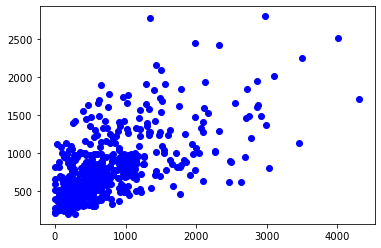

0.6196454607847686

In [163]:
plt.scatter(yargs_test, y_pred, color = 'blue') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.show()

np.corrcoef(yargs_test, y_pred)[0, 1]

In [164]:
##xgboost - seems to perform worse than random forest, at least with initial data
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## split data into X and y
xargs=df[['ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b', 'nd_r_g', 'wdrvi5', 'savi', 'Elevation']] 
yargs=df['Plant_Biomass'] 

## split data into train and test sets
size_x = 0.2
seed = 0
x_xg_train, x_xg_test, y_xg_train, y_xg_test = train_test_split(xargs, yargs, test_size=size_x, random_state = seed)

##fit model no training data
xg_reg = XGBClassifier()
xg_reg.fit(x_xg_train, y_xg_train)

##make predictions for test data
y_xg_pred = xg_reg.predict(x_xg_test)
# predictions = [round(value) for value in y_pred]

##evaluate predictions

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_xg_test, y_xg_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_xg_test, y_xg_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_xg_test, y_xg_pred)))

r_square = metrics.r2_score(y_xg_test, y_xg_pred)
print(r_square)
print(reg_x.score(x_xg_test, y_xg_test))


# accuracy = accuracy_score(yargs_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:25:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean Absolute Error: 495.8690630975143
Mean Squared Error: 540300.9640128949
Root Mean Squared Error: 735.0516743827571
-0.1698393614215763
0.3815525979614165


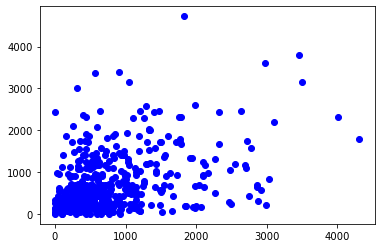

0.41568523345158837

In [142]:
plt.scatter(y_xg_test, y_xg_pred, color = 'blue') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.show()

np.corrcoef(y_xg_test, y_xg_pred)[0, 1]